In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path


In [2]:
# mit stats irgendwie die spieler rausfinden und explosionen etc nicht mitnehmen

def player_filter(data):
    data.drop(columns=['white','teal',"darkteal","gray"], inplace=True, errors='ignore')
    return data

In [6]:
class Colors:
    @staticmethod
    def red():
        return (239, 8, 8)

    @staticmethod
    def darkred():
        return (148, 20, 33)

    @staticmethod
    def orange():
        return (255, 134, 57)

    @staticmethod
    def darkorange():
        return (181, 101, 24)

    @staticmethod
    def darkgold():
        return (165, 150, 0)

    @staticmethod
    def yellow():
        return (255, 251, 0)

    @staticmethod
    def lime():
        return (156, 219, 0)

    @staticmethod
    def green():
        return (66, 190, 66)

    @staticmethod
    def darkgreen():
        return (41, 138, 82)

    @staticmethod
    def teal():
        return (41, 77, 74)

    @staticmethod
    def darkteal():
        return (41, 77, 74)

    @staticmethod
    def blue():
        return (66, 109, 239)

    @staticmethod
    def darkblue():
        return (41, 40, 231)

    @staticmethod
    def purple():
        return (90, 0, 165)

    @staticmethod
    def violet():
        return (148, 97, 255)

    @staticmethod
    def turkis():
        return (99, 255, 206)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)

parent_dir = Path.cwd().parent
file_path = parent_dir / "data" / "processed" / "Session_1s_2025-09-19_14-45-02" / "stats.csv"
#file_path = parent_dir / "data" / "processed" / "Session_5s_2025-09-16_15-36-40" / "stats.csv"
screenshot_path = parent_dir / "data" / "processed" / "Session_1s_2025-09-19_14-45-02" / "screenshot.png"
# Datei laden (z. B. mit pandas)




df = pd.read_csv(file_path)
#player_filter(df)
df.drop(columns=['Frame'], inplace=True, errors='ignore')

print(df.head())

   time       blue   darkblue    darkgold   darkgreen  darkorange   darkred  \
0   9.0    [13, 0]    [16, 0]  [nan, nan]  [nan, nan]  [nan, nan]    [9, 0]   
1  12.0   [31, 82]  [32, 100]  [nan, nan]  [nan, nan]  [nan, nan]  [26, 44]   
2  16.0   [54, 39]   [55, 31]  [nan, nan]  [nan, nan]  [nan, nan]  [49, 46]   
3  19.0  [71, 114]   [73, 93]  [nan, nan]  [nan, nan]  [nan, nan]  [66, 76]   
4  23.0  [88, 147]   [90, 52]  [nan, nan]  [nan, nan]  [nan, nan]  [83, 50]   

     darkteal       gray       green  ...     magenta     orange        pink  \
0  [nan, nan]    [17, 0]  [nan, nan]  ...  [nan, nan]    [14, 0]  [nan, nan]   
1  [nan, nan]  [35, 656]  [nan, nan]  ...  [nan, nan]  [32, 106]  [nan, nan]   
2  [nan, nan]  [58, 341]  [nan, nan]  ...  [nan, nan]   [55, 68]  [nan, nan]   
3  [nan, nan]  [75, 667]  [nan, nan]  ...  [nan, nan]   [72, 46]  [nan, nan]   
4  [nan, nan]  [92, 426]  [nan, nan]  ...  [nan, nan]  [89, 108]  [nan, nan]   

     purple       red        teal     turkis

In [35]:
def get_data(df, nr=0):
    import ast
    stat = pd.DataFrame()
    pow = pd.DataFrame()
    for col in df.columns:
        if col != "time":
            def safe_eval(x):
                if "nan" in str(x):
                    x = x.replace("nan", "0")
                if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
                    try:
                        return ast.literal_eval(x)
                    except Exception:
                        return [np.nan, np.nan]
                return x
            df[col] = df[col].apply(safe_eval)
            stat[col]=(df[col].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else np.nan))
            pow[col]=(df[col].apply(lambda x: x[1] if isinstance(x, (list, np.ndarray)) else np.nan))
        else:
            stat[col] = df[col]
            pow[col] = df[col]
    if nr == 0:
        return stat
    elif nr == 1:
        return pow

base_dir = Path.cwd().parent / "data" / "processed"
session_dirs = [d for d in base_dir.iterdir() if d.is_dir()]

name = []
stats = []
power = []
for session_dir in session_dirs:
    # Pfad zur stats.csv
    stats_file = session_dir / "stats.csv"
    data = pd.read_csv(stats_file)
    data.drop(columns=['Frame'], inplace=True, errors='ignore')
    stat = get_data(data, 0)
    pow = get_data(data, 1)
    print(stat.head())
    
    data = player_filter(data)
    stats.append(stat)
    power.append(pow)
    name.append(session_dir.name)

bilder = []
screen_dir = Path.cwd().parent / "data" / "raw" / "screenshots"
session_dirs = [d for d in screen_dir.iterdir() if d.is_dir()]

for session_dir in session_dirs:
    screenshot_files = sorted(session_dir.glob("*.png"))
    stats_file = session_dir / screenshot_files[0]
    bilder.append(stats_file)

   time  blue  darkblue  darkgold  darkgreen  darkorange  darkred  darkteal  \
0   9.0    13        16         0          0           0        9         0   
1  12.0    31        32         0          0           0       26         0   
2  16.0    54        55         0          0           0       49         0   
3  19.0    71        73         0          0           0       66         0   
4  23.0    88        90         0          0           0       83         0   

   gray  green  ...  magenta  orange  pink  purple  red  teal  turkis  violet  \
0    17      0  ...        0      14     0      13    8    10      15      13   
1    35      0  ...        0      32     0      30   25    31      31      29   
2    58      0  ...        0      55     0      52   48    53      53      51   
3    75      0  ...        0      72     0      68   66    70      70      68   
4    92      0  ...        0      89     0      85   83    86      86      84   

   white  yellow  
0     15      14  


Session: Session_1s_2025-09-19_14-45-02


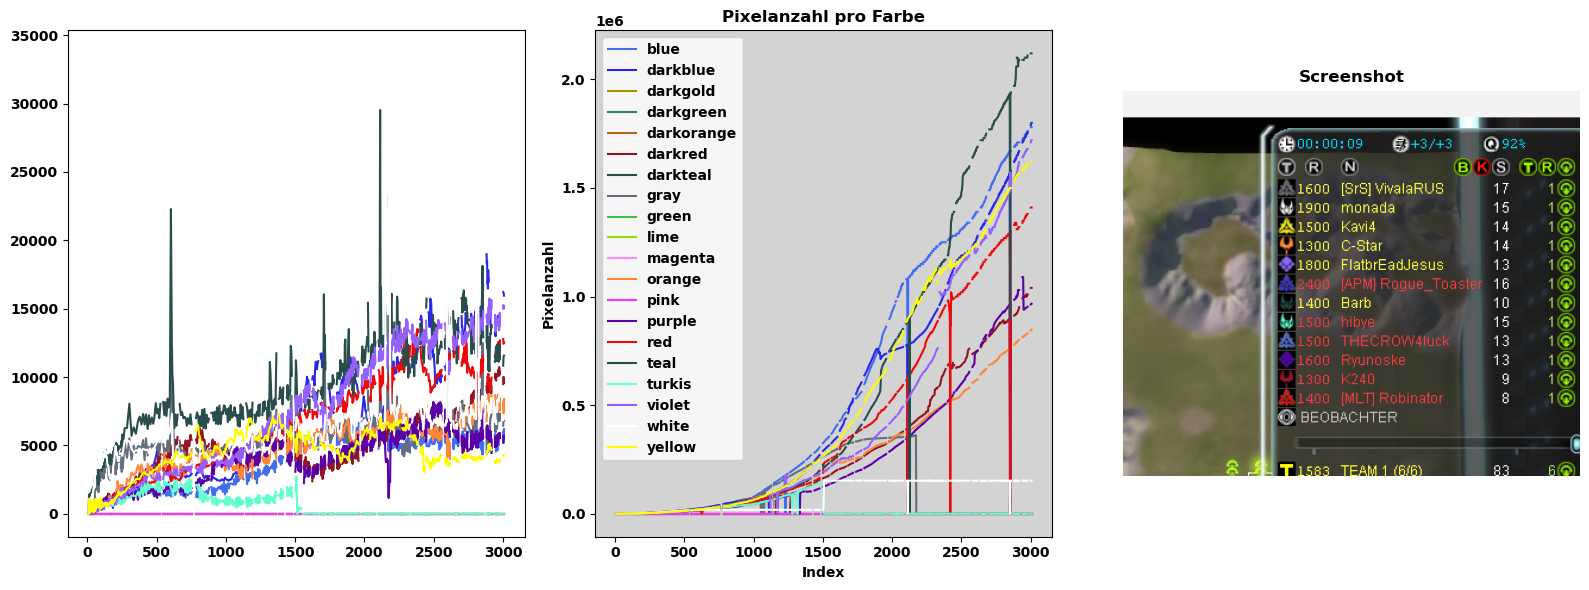

Session: Session_1s_2025-09-19_15-13-52


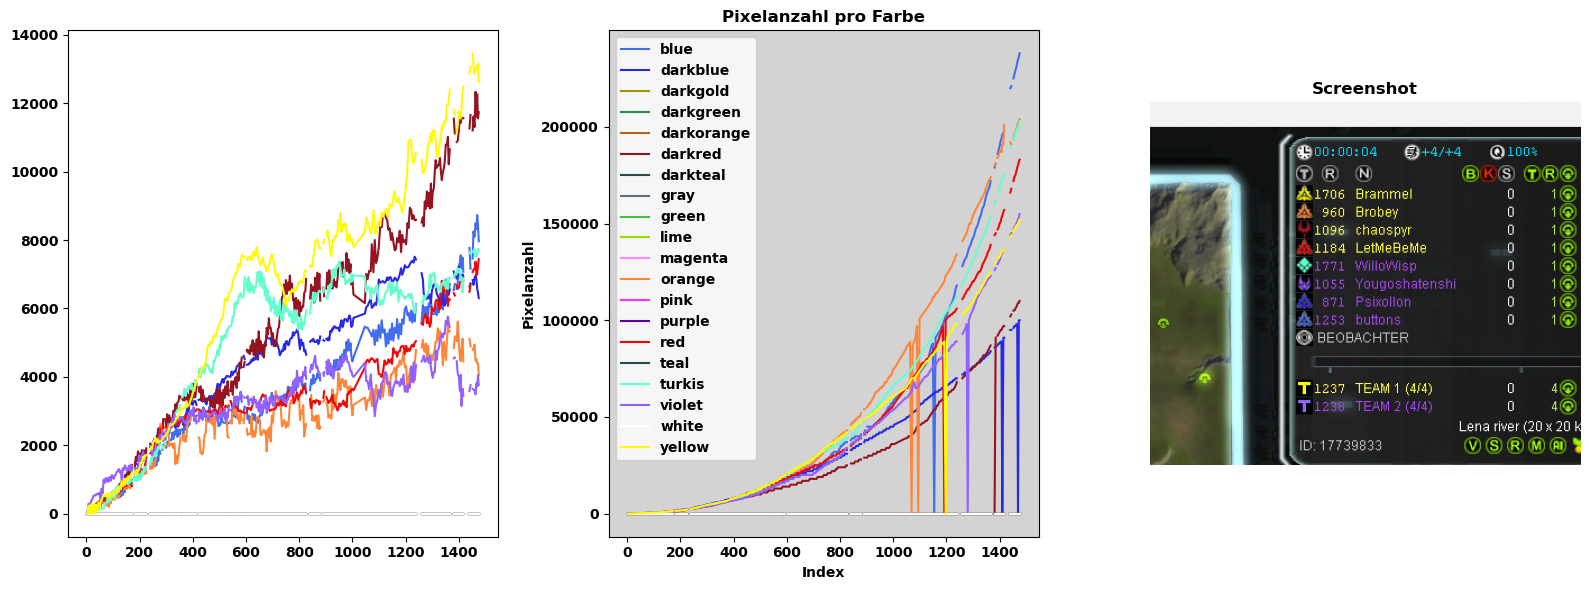

Session: Session_1s_2025-09-19_15-37-05


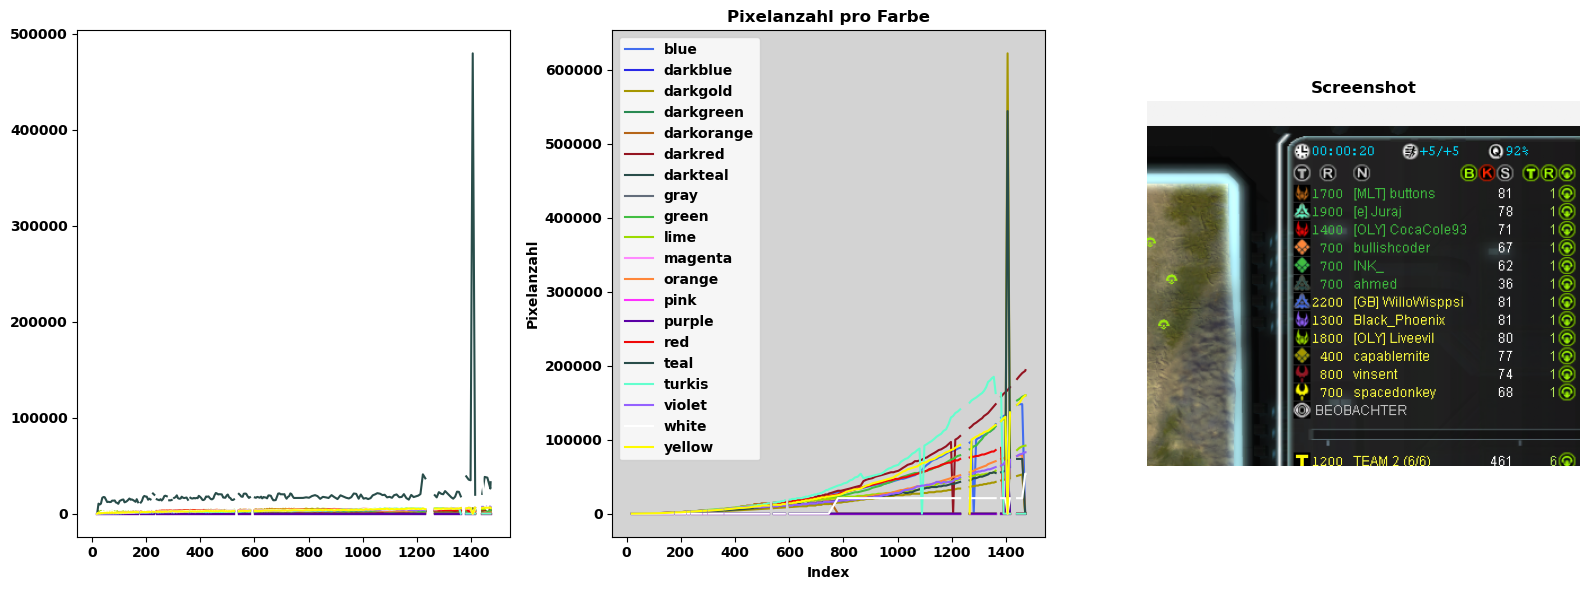

Session: Session_4s_2025-09-19_15-13-52


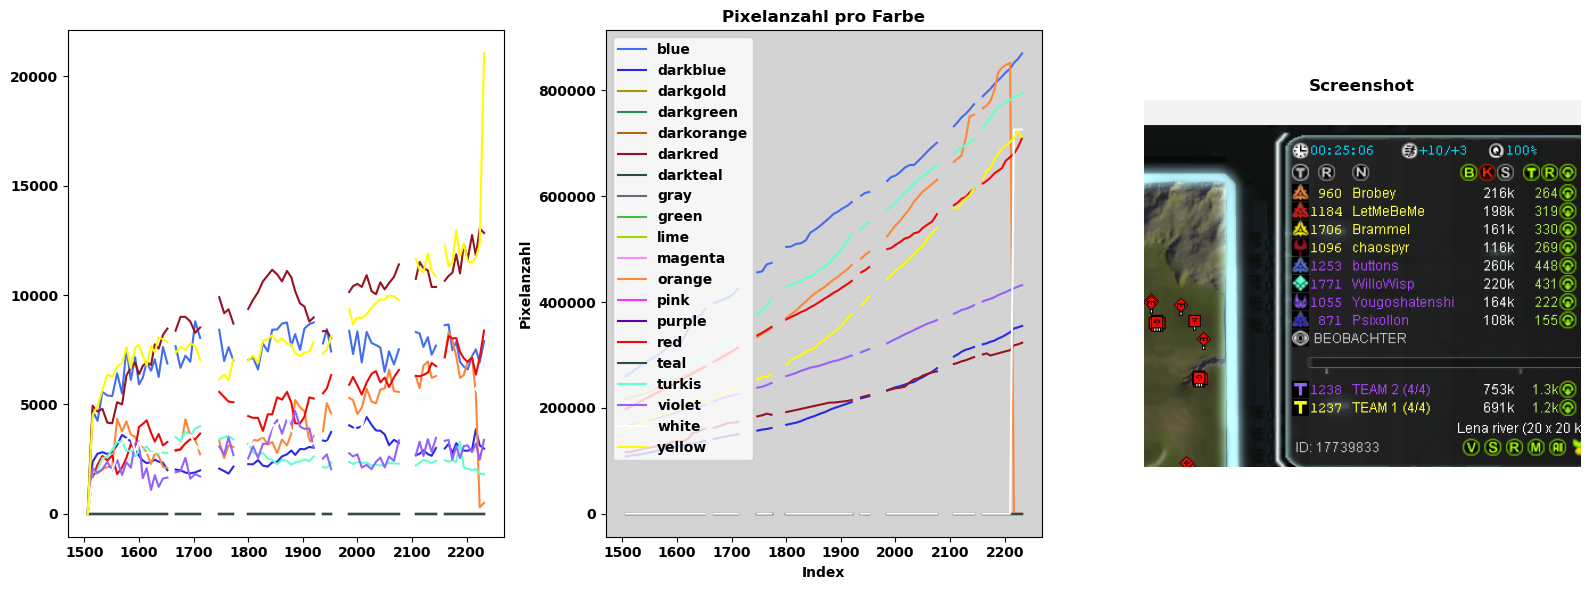

Session: Session_5s_2025-09-17_20-36-31


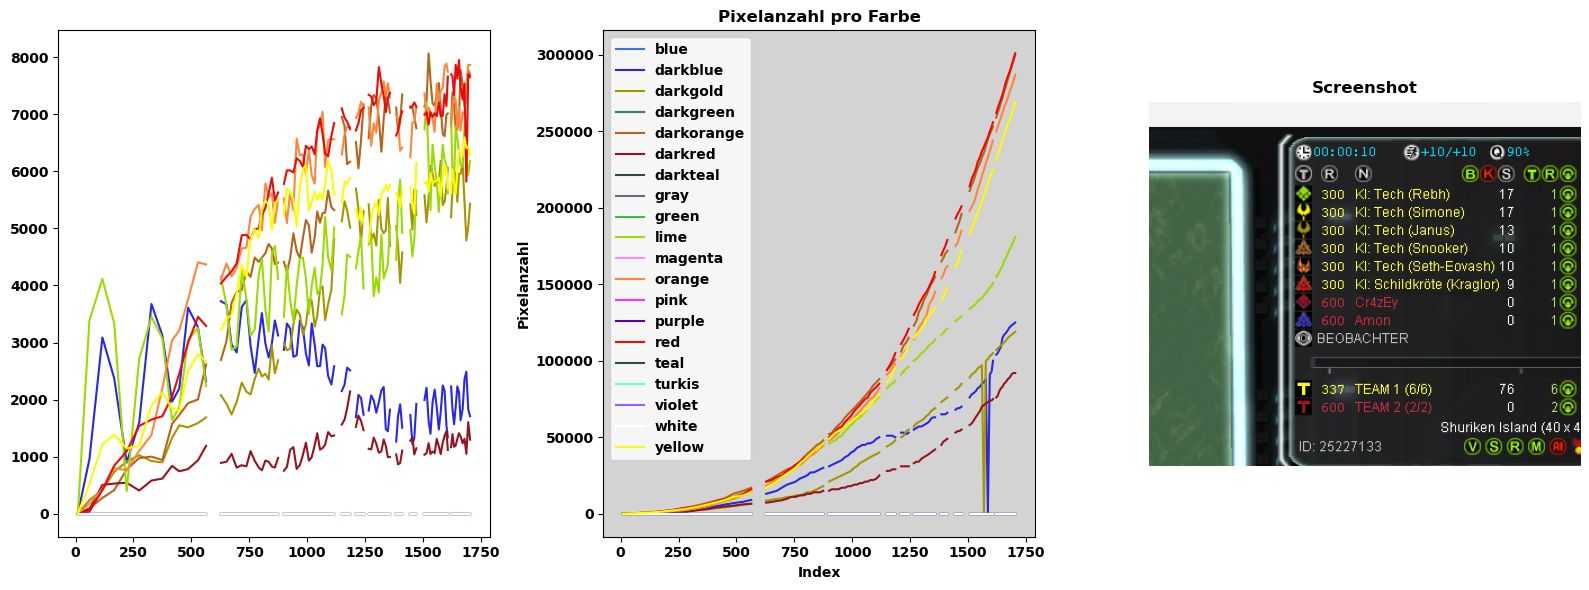

Session: Session_5s_2025-09-17_20-51-31


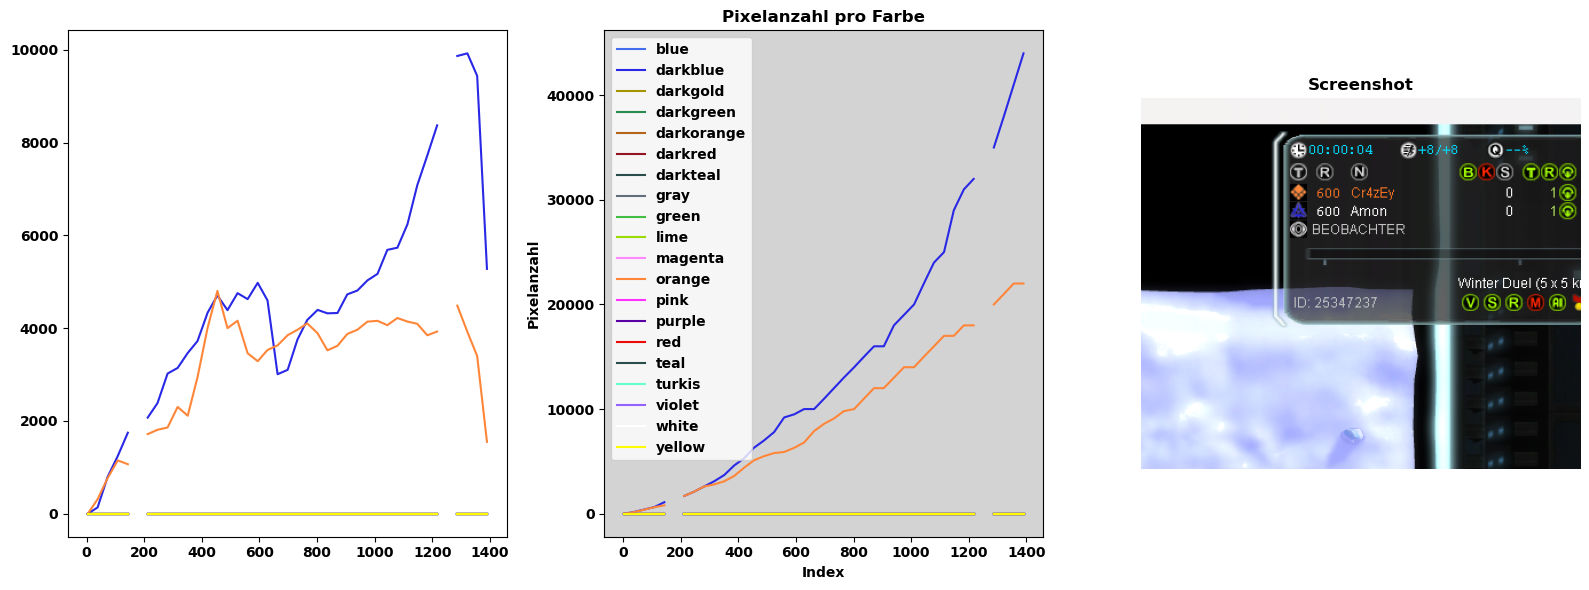

Session: Session_5s_2025-09-18_15-15-37


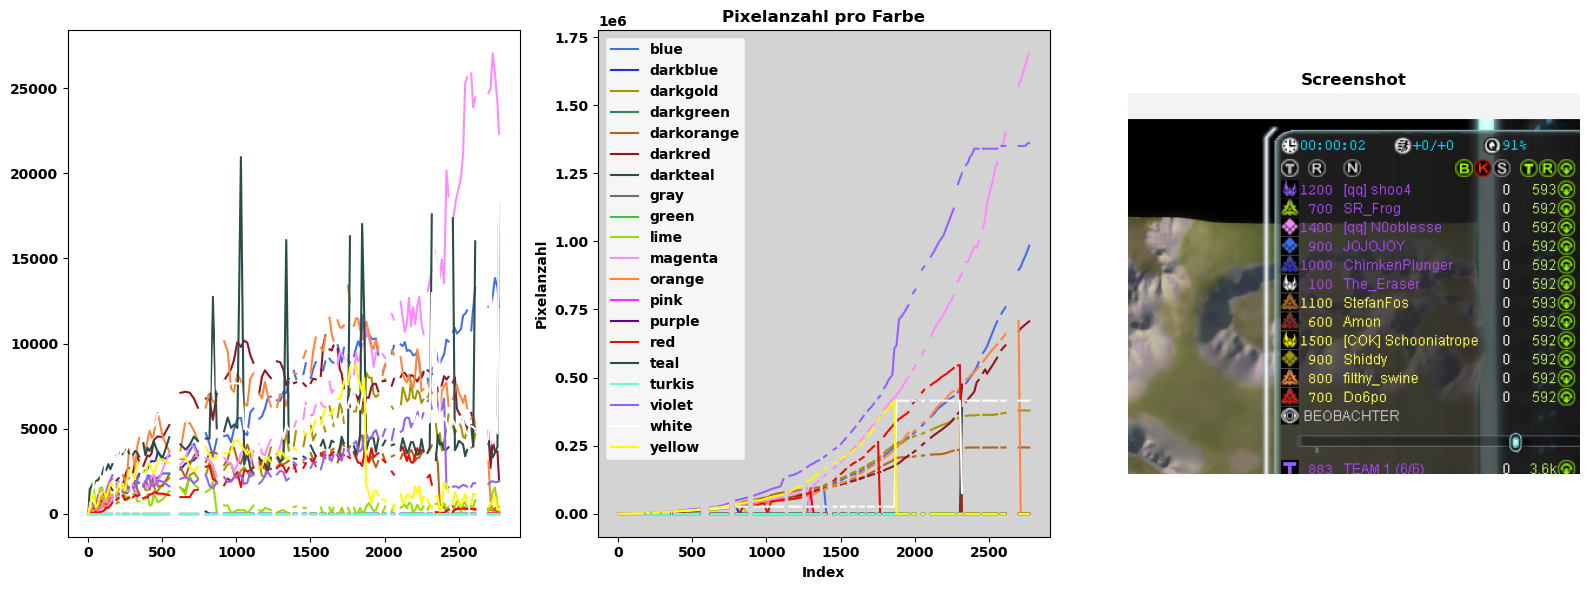

Session: Session_5s_2025-09-18_15-34-25


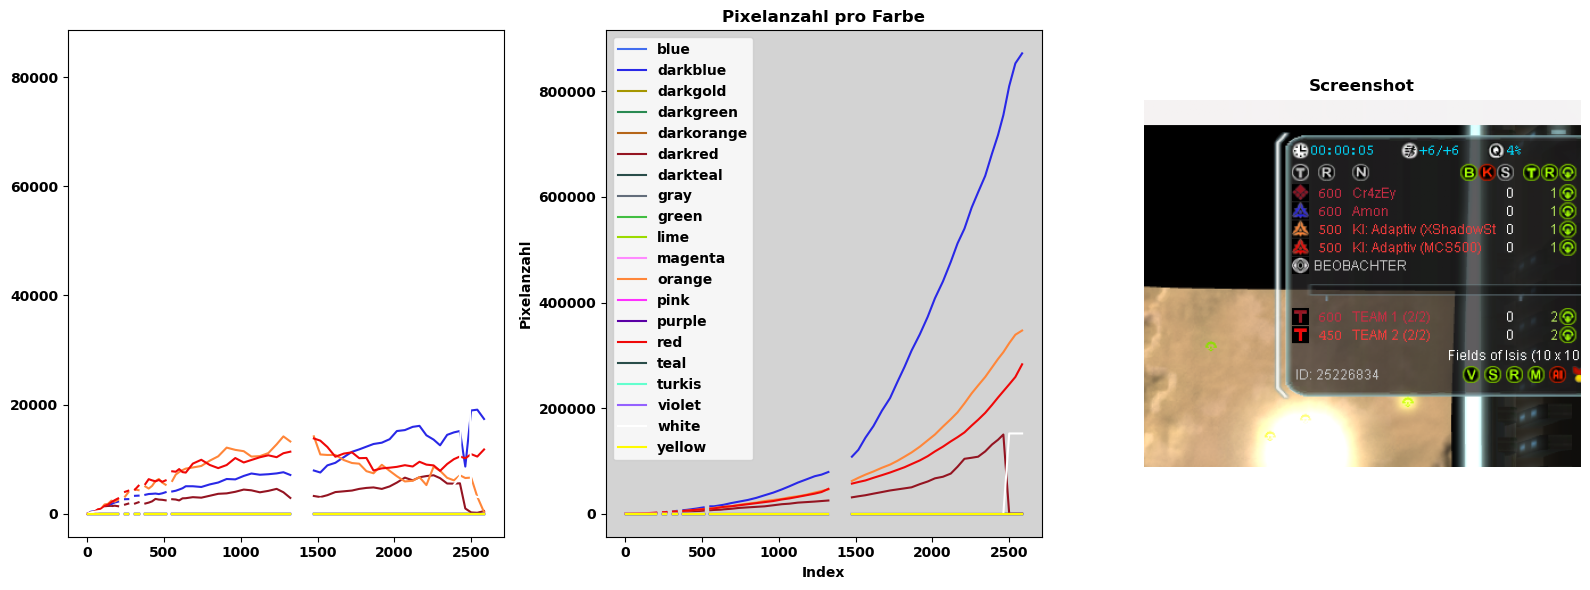

In [36]:
class Colors:
    @staticmethod
    def red():
        return (239, 8, 8)

    @staticmethod
    def darkred():
        return (148, 20, 33)

    @staticmethod
    def orange():
        return (255, 134, 57)

    @staticmethod
    def darkorange():
        return (181, 101, 24)

    @staticmethod
    def darkgold():
        return (165, 150, 0)

    @staticmethod
    def yellow():
        return (255, 251, 0)

    @staticmethod
    def lime():
        return (156, 219, 0)

    @staticmethod
    def green():
        return (66, 190, 66)

    @staticmethod
    def darkgreen():
        return (41, 138, 82)

    @staticmethod
    def teal():
        return (41, 77, 74)

    @staticmethod
    def darkteal():
        return (41, 77, 74)

    @staticmethod
    def blue():
        return (66, 109, 239)

    @staticmethod
    def darkblue():
        return (41, 40, 231)

    @staticmethod
    def purple():
        return (90, 0, 165)

    @staticmethod
    def violet():
        return (148, 97, 255)

    @staticmethod
    def turkis():
        return (99, 255, 206)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)



colors = Colors()
for s,p,b,n in zip(stats,power,bilder,name):
    print(f"Session: {n}")
    p = p.dropna(axis=1, how='all')

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    for column in s.columns:
        if column == "time":
            continue
        color_method = getattr(colors, column)
        color_value = color_method()
        normalized_color = tuple(c / 255.0 for c in color_value)
        axes[1].plot(p["time"], s[column], label=column, c=normalized_color)
        try:
            x = p.loc[p[column].notna(), "time"]
            y = p[column].dropna()
            axes[0].plot(x, y, label=column, c=normalized_color)
        except KeyError:
            pass
    axes[1].set_facecolor("lightgray")
    axes[1].set_title("Pixelanzahl pro Farbe")
    axes[1].legend()
    axes[1].set_xlabel("Index")
    axes[1].set_ylabel("Pixelanzahl")

    
    img = mpimg.imread(b)
    height, width, _ = img.shape
    # crop_top = int(height * 0.0)  # 10% von oben
    # crop_bottom = int(height * 0.8)  # 90% von unten
    # crop_left = int(width * 0.2)  # 10% von links
    # crop_right = int(width * 0.9)  # 90% von rechts

    crop_top = int(height * 0.0)  # 10% von oben
    crop_bottom = int(height * 0.3)  # 90% von unten
    crop_left = int(width * 0.7)  # 10% von links
    crop_right = int(width * 0.9)  # 90% von rechts


    # Bild zuschneiden
    cropped_img = img[crop_top:crop_bottom, crop_left:crop_right]
    axes[2].imshow(cropped_img)
    axes[2].axis("off") 
    axes[2].set_title("Screenshot")

    # Plot anzeigen
    plt.tight_layout()
    plt.show()